# Who Should Have Been the NBA 2022/23 Regular Season MVP?
### 2023/23 NBA Player Stats

This study will help the NBA make data-driven regular-season MVP decisions, instead of using popularity through votes. I will use the data to determine who is truly worthy of the 2022/23 NBA MVP title.

<u>Actual 2022/23 Season MVP Results</u>  
    
**Winner: Joel Embiid**
1. Joel Embiid (Philadelphia 76ers) | 33.1 ppg, 10.2 rpg, 4.2 apg | 915 voting points
2. Nikola Jokic (Denver Nuggets) | 24.5 ppg, 11.8 rpg, 9.8 apg | 674 voting points
3. Giannis Antetokounmpo (Milwaukee Bucks) | 31.1 ppg, 11.8 rpg, 5.7 bpg | 606 voting points
    
Data Source: https://www.kaggle.com/datasets/joebeachcapital/nba-player-statistics/

## Table of Contents

1. View the data
2. Check for null values
3. Handling duplicates
4. League statistics
5. Normalize the dataset  
    5.1 Assign weights to metrics
6. Results  
    6.1. Other interesting finds
7. Summary and final thoughts
8. Understanding the dataset

In [24]:
import os

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

print('Successfully downloaded and imported all packages')

Successfully downloaded and imported all packages


## 1. View the Data

In [59]:
season_stats = pd.read_csv("C:\\Users\\lukaz\\Luka's Python\\nba_data_processed.csv")

In [60]:
season_stats.head(10) # quick look at the data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,0.488,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,0.384,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
8,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,0.440,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,0.644,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3


In [61]:
season_stats.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  624 non-null    object 
 1   Pos     624 non-null    object 
 2   Age     624 non-null    int64  
 3   Tm      624 non-null    object 
 4   G       624 non-null    int64  
 5   GS      624 non-null    int64  
 6   MP      624 non-null    float64
 7   FG      624 non-null    float64
 8   FGA     624 non-null    float64
 9   FG%     624 non-null    float64
 10  3P      624 non-null    float64
 11  3PA     624 non-null    float64
 12  3P%     624 non-null    float64
 13  2P      624 non-null    float64
 14  2PA     624 non-null    float64
 15  2P%     624 non-null    float64
 16  eFG%    624 non-null    float64
 17  FT      624 non-null    float64
 18  FTA     624 non-null    float64
 19  FT%     624 non-null    float64
 20  ORB     624 non-null    float64
 21  DRB     624 non-null    float64
 22  TR

## 2. Check for Null Values

In [62]:
checK_nulls = season_stats.isnull().sum()
checK_nulls

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

There were several blank rows in the original data that I deleted, there are no more blank values in the data.

## 3. Handling Duplicates

There are duplicates in the data because some players got traded mid-season, so 1 player can appear in multiple rows. However, the dataset includes a **TOT** under **Tm** column which shows the aggregated data for that player. It always is the first row for that table. I will remove duplcaites for all players that have **TOT** under the **Tm** column.

In [64]:
season_stats_tot = season_stats.drop_duplicates(subset='Player', keep='first')

In [67]:
season_stats_tot.head(10) # quick look at the new data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
8,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,0.440,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,0.644,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
10,Jose Alvarado,PG,24,NOP,61,10,21.5,3.3,8.0,0.411,...,0.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0
11,Kyle Anderson,PF,29,MIN,69,46,28.4,3.7,7.2,0.509,...,0.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4


Line 5 of the data shows **Nickeil Alexander-Walker** who played for the Utah Jazz and Minnesota Timberwolves in the 2022/23 season. His team is now listed as **TOT**. Check complete.

## 4. League Statistics

Looking at averages, percentiles, and max values for each column helps put in perspective how potential MVP's perform relative to the rest of the league.

In [68]:
season_stats_tot.describe() 

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,25.830677,50.500000,24.091633,20.625896,3.516534,7.467729,0.466000,1.050996,2.944821,0.326857,...,0.759225,0.880279,2.778486,3.658964,2.170319,0.631076,0.391235,1.153586,1.750199,9.598406
std,4.360640,23.010867,27.557155,9.070621,2.421862,4.926193,0.082952,0.870788,2.234211,0.119505,...,0.135888,0.724582,1.747269,2.302925,1.937418,0.377129,0.375607,0.822426,0.749045,6.810699
min,19.000000,1.000000,0.000000,2.800000,0.200000,1.000000,0.158000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,23.000000,35.000000,1.000000,13.400000,1.700000,3.600000,0.419000,0.400000,1.200000,0.297250,...,0.696000,0.400000,1.500000,2.000000,0.900000,0.300000,0.200000,0.600000,1.200000,4.625000
50%,25.000000,56.000000,9.000000,19.500000,2.800000,6.100000,0.455000,0.800000,2.500000,0.347500,...,0.769000,0.700000,2.400000,3.100000,1.400000,0.600000,0.300000,0.900000,1.700000,7.450000
75%,29.000000,69.000000,50.000000,28.600000,4.600000,9.875000,0.500000,1.500000,4.300000,0.385750,...,0.843750,1.200000,3.600000,4.600000,2.900000,0.800000,0.500000,1.500000,2.200000,12.675000
max,42.000000,83.000000,83.000000,37.400000,11.200000,22.200000,0.776000,4.900000,11.400000,1.000000,...,1.000000,5.100000,9.600000,12.500000,10.700000,2.200000,3.000000,4.100000,5.000000,33.100000


We can use visualizations to better show distributions of common stats, so we can later compare MVP's performance to the rest of the league.

* MP (Minutes Played)
* FG% (Field Goal Percentage)
* TRB (Total Rebounds)
* AST (Assists)
* PTS (Points): integer - total points scored by the player

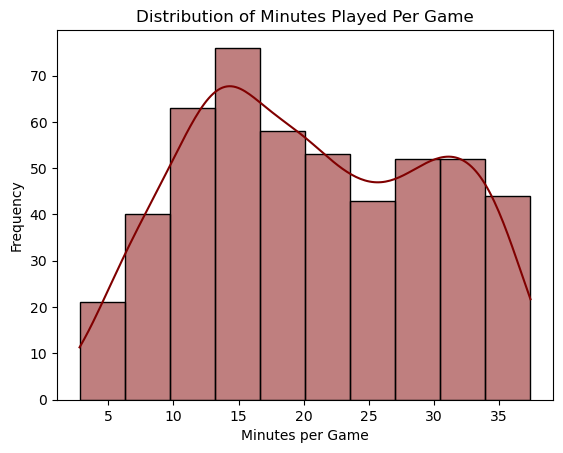

In [84]:
sns.histplot(season_stats_tot['MP'], bins=10, kde=True, color='maroon')
plt.title('Distribution of Minutes Played Per Game')
plt.xlabel('Minutes per Game')
plt.ylabel('Frequency')
plt.show()

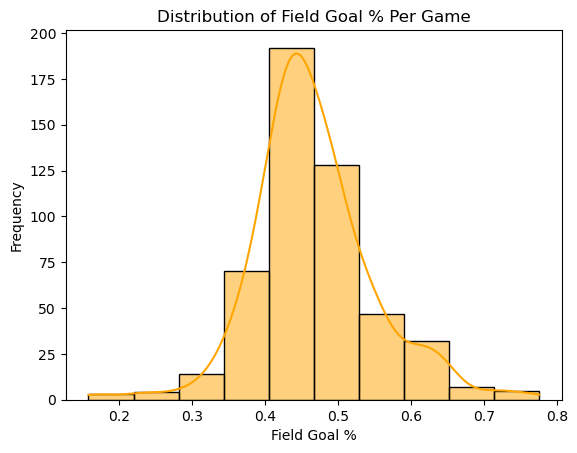

In [85]:
sns.histplot(season_stats_tot['FG%'], bins=10, kde=True, color='orange')
plt.title('Distribution of Field Goal % Per Game')
plt.xlabel('Field Goal %')
plt.ylabel('Frequency')
plt.show()

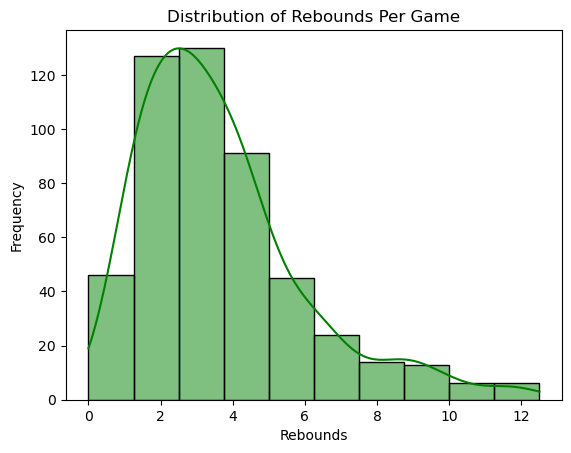

In [86]:
sns.histplot(season_stats_tot['TRB'], bins=10, kde=True, color='green')
plt.title('Distribution of Rebounds Per Game')
plt.xlabel('Rebounds')
plt.ylabel('Frequency')
plt.show()

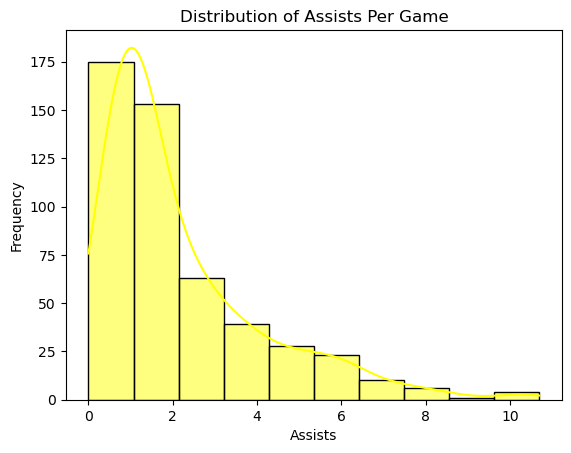

In [87]:
sns.histplot(season_stats_tot['AST'], bins=10, kde=True, color='yellow')
plt.title('Distribution of Assists Per Game')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

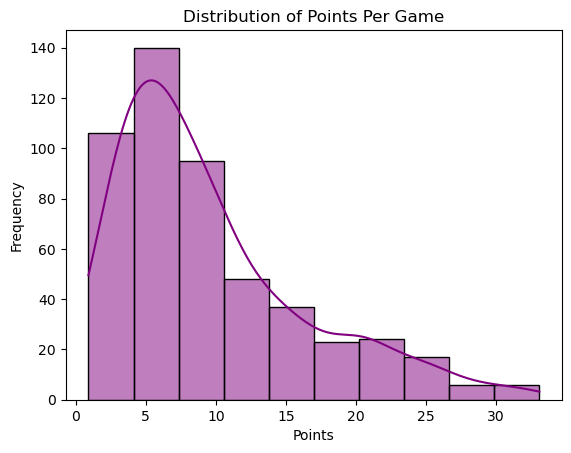

In [88]:
sns.histplot(season_stats_tot['PTS'], bins=10, kde=True, color='purple')
plt.title('Distribution of Points Per Game')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

## 5. Normalize the Dataset

We normalize the dataset for several reasons:

1. **Comparability:** It was imperative to standardize different statistics to the same scale to enable direct comparison, as the dataset includes a variety of metrics such as rates and counts that are originally on different scales.  


2. **Handling Skewed Data:** The NBA data exhibits performance outliers, which are common in sports statistics. Z-score standardization mitigates the influence of these outliers, ensuring that they do not disproportionately affect the analysis.  


3. **Weight of Influence:** To construct a composite score from multiple metrics, it’s essential that each metric contributes equally. Standard scaling ensures that metrics with larger ranges do not unduly dominate the composite score.   


4. **Outlier Identification:** After standardization, outliers are more readily identifiable. Values significantly above or below the mean, typically by more than two or three standard deviations, are clearly distinguished as outliers, facilitating cleaner and more robust analysis.   


In [91]:
from sklearn.preprocessing import StandardScaler
features_to_normalize = ['PTS', 'MP', '3P%', '2P%', 'AST', 'TRB', 'BLK', 'STL', 'FTA']
scaler = StandardScaler()
season_stats_tot[features_to_normalize] = scaler.fit_transform(season_stats_tot[features_to_normalize])
season_stats_tot

C:\Users\lukaz\AppData\Local\Temp\ipykernel_9592\816962796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats_tot[features_to_normalize] = scaler.fit_transform(season_stats_tot[features_to_normalize])


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,0.008178,3.6,7.3,0.485,...,0.702,1.8,4.1,1.017563,-0.656330,-0.082483,0.289860,1.1,1.9,-0.058555
1,Steven Adams,C,29,MEM,42,42,0.703421,3.7,6.3,0.597,...,0.364,5.1,6.5,3.408213,0.067002,0.713795,1.888867,1.9,2.3,-0.146740
2,Bam Adebayo,C,25,MIA,75,75,1.542126,8.0,14.9,0.540,...,0.806,2.5,6.7,2.408486,0.532001,1.510073,1.089364,2.5,2.8,1.587556
3,Ochai Agbaji,SG,22,UTA,59,22,-0.013893,2.8,6.5,0.427,...,0.812,0.7,1.3,-0.677625,-0.552997,-0.878761,-0.243143,0.7,1.7,-0.249622
4,Santi Aldama,PF,22,MEM,77,20,0.129569,3.2,6.8,0.470,...,0.750,1.1,3.7,0.495967,-0.449664,-0.082483,0.556361,0.8,1.9,-0.087950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Thaddeus Young,PF,34,TOR,54,9,-0.653958,2.0,3.7,0.545,...,0.692,1.3,1.8,-0.242961,-0.397997,0.979221,-0.776145,0.8,1.6,-0.764032
620,Trae Young,PG,24,ATL,73,73,1.564197,8.2,19.0,0.429,...,0.886,0.8,2.2,-0.286428,4.148661,1.244647,-0.776145,4.1,1.4,2.440007
621,Omer Yurtseven,C,24,MIA,9,0,-1.260916,1.8,3.0,0.593,...,0.833,0.9,1.7,-0.460293,-1.017996,-1.144187,-0.509644,0.4,1.8,-0.764032
622,Cody Zeller,C,30,MIA,15,2,-0.676029,2.5,3.9,0.627,...,0.686,1.7,2.6,0.278635,-0.759663,-1.144187,-0.243143,0.9,2.2,-0.455386


### 5.1. Assign Weights to Metrics

I'll assign weights to metrics based on most important, to least important in the NBA MVP conversation.   
*Weights assigned are my personal opinion on what makes a player most valuable to their team*

* PTS (Points) - 20%
* MP (Minutes Played) - 20%
* 3P% (3-Point Field Goal Percentage) - 15%
* 2P% (2-Point Field Goal Percentage) - 10%
* AST (Assists) - 10%  
* TRB (Total Rebounds) - 10%
* BLK (Blocks) - 5%
* STL (Steals) - 5%
* FTA (Free Throw Attempts) - 5%

In [92]:
weights = {'PTS': 0.20, 'MP': .20, '3P%': 0.15, '2P%': .10, 'AST': .10, 'TRB': .10, 'BLK': .05, 'STL': .05, 'FTA': .05}

## 2022/23 NBA Regular Season MVP

In [114]:
season_stats_tot['composite_score'] = season_stats_tot[features_to_normalize].mul(weights).sum(axis=1)
mvp_rankings = season_stats_tot.sort_values(by='composite_score', ascending=False)
mvp_rankings['rank'] = range(1,len(mvp_rankings)+1)
mvp_rankings.head(10)

C:\Users\lukaz\AppData\Local\Temp\ipykernel_9592\3325365061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats_tot['composite_score'] = season_stats_tot[features_to_normalize].mul(weights).sum(axis=1)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,composite_score,rank
141,Luka Dončić,PG,23,DAL,66,66,1.718696,10.9,22.0,0.496,...,7.8,2.147688,3.011997,2.040925,0.289860,3.6,2.5,3.351247,1.940035,1
162,Joel Embiid,C,28,PHI,66,66,1.542126,11.0,20.1,0.548,...,8.4,2.843150,1.048667,0.979221,3.487874,3.4,3.1,3.454129,1.920987,2
289,Nikola Jokić,C,27,DEN,69,69,1.442806,9.4,14.8,0.632,...,9.4,3.538612,3.941995,1.775499,0.822862,3.6,2.5,2.190151,1.915318,3
12,Giannis Antetokounmpo,PF,28,MIL,63,63,1.266236,11.2,20.3,0.553,...,9.6,3.538612,1.823665,0.448369,1.089364,3.9,3.1,3.160181,1.763101,4
185,Shai Gilgeous-Alexander,PG,24,OKC,68,68,1.641447,10.4,20.3,0.510,...,4.0,0.495967,1.720332,2.571777,1.622366,2.8,2.8,3.204273,1.654872,5
340,Damian Lillard,PG,32,POR,58,58,1.729731,9.6,20.7,0.463,...,4.0,0.495967,2.650331,0.713795,-0.243143,3.3,1.9,3.321853,1.641057,6
152,Kevin Durant,PF,34,TOT,47,47,1.652482,10.3,18.3,0.560,...,6.3,1.321828,1.461999,0.182943,2.688371,3.3,2.1,2.866232,1.635487,7
541,Jayson Tatum,SF,24,BOS,74,74,1.795945,9.8,21.1,0.466,...,7.7,2.234621,1.255333,1.244647,0.822862,2.9,2.2,3.013207,1.633124,8
122,Anthony Davis,C,29,LAL,56,54,1.475913,9.7,17.2,0.563,...,9.1,3.842876,0.222002,1.244647,4.287378,2.2,2.6,2.395915,1.576465,9
277,LeBron James,PF,38,LAL,55,54,1.641447,11.1,22.2,0.500,...,7.1,2.017289,2.391998,0.713795,0.556361,3.2,1.6,2.836837,1.537913,10


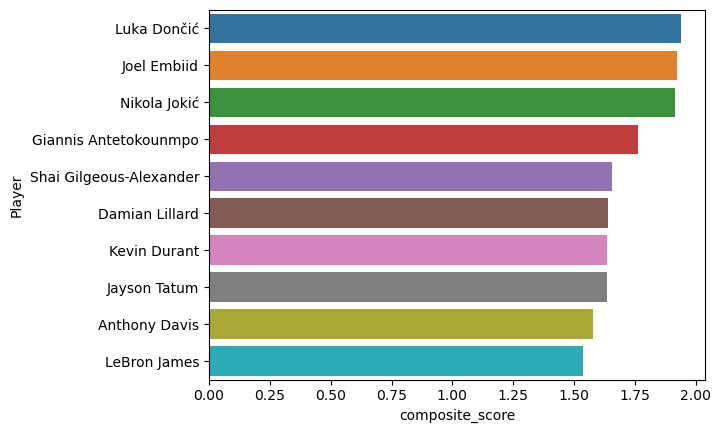

In [113]:
sns.barplot(x='composite_score', y='Player', data = mvp_rankings.head(10))
plt.title='Top 5 Players by Composite Score'
plt.xlabel='Composite Score'
plt.ylabel='Player'
plt.show()

## 6. Results

Based on this analysis, the 2022/23 NBA Regular Season MVP should have been Luka Doncic, although Joel Embiid and Nikola Jokic were very close. 

## 6.1. Other Interesting Finds

3 of the top 4 players in this list play at the power forward/center position. Skilled "big men' seem to be resurrecting their importance in the modern-day NBA as 2010-2020 had more teams emphasizing point-gaurds and shooting-guards than right now.

## 7. Summary & Final Thoughts

The NBA uses a votes system to choose a regular season MVP, these were the results:
1. Joel Embiid
2. Nikola Jokic
3. Giannis Antetokounmpo

This analysis provides a comprehensive look at the top NBA players 2022/23 regular season across all positions. Using regular season data, I performed an analysis on who should have won the 2022/23 NBA regular season MVP based on each players composite score. The composite score is made up of several key metrics, weighted in importance used to determine which player was most valuable. The analysis considers several performance metrics accross several categories (defence, offense, etc.) to not exclude any positions.  

This analysis uses data to choose a regular season MVP, these were the results:
1. Luka Doncic
2. Joel Embiid
3. Nikola Jokic

This analysis suggests that the importance of certain positions is changing in the modern-day NBA, as typically shooting-guards and point-guards typically rank highly on MVP lists because they are relied on for scoring. 3 of the top 4 players in my analysis, as well as 3 out of 3 in the NBA MVP race are power-forwards or centers, commonly called 'Big Men.'

## 8. Understanding the dataset 

* Player: string - name of the player
* Pos (Position): string - position played by the player
* Age: integer - age of the player as of February 1, 2023
* Tm (Team): string - team the player belongs to
* G (Games Played): integer - number of games played by the player
* GS (Games Started): integer - number of games started by the player
* MP (Minutes Played): integer - total minutes played by the player
* FG (Field Goals): integer - number of field goals made by the player
* FGA (Field Goal Attempts): integer - number of field goal attempts by the player
* FG% (Field Goal Percentage): float - percentage of field goals made by the player
* 3P (3-Point Field Goals): integer - number of 3-point field goals made by the player
* 3PA (3-Point Field Goal Attempts): integer - number of 3-point field goal attempts by the player
* 3P% (3-Point Field Goal Percentage): float - percentage of 3-point field goals made by the player
* 2P (2-Point Field Goals): integer - number of 2-point field goals made by the player
* 2PA (2-point Field Goal Attempts): integer - number of 2-point field goal attempts by the player
* 2P% (2-Point Field Goal Percentage): float - percentage of 2-point field goals made by the player
* eFG% (Effective Field Goal Percentage): float - effective field goal percentage of the player
* FT (Free Throws): integer - number of free throws made by the player
* FTA (Free Throw Attempts): integer - number of free throw attempts by the player
* FT% (Free Throw Percentage): float - percentage of free throws made by the player
* ORB (Offensive Rebounds): integer - number of offensive rebounds by the player
* DRB (Defensive Rebounds): integer - number of defensive rebounds by the player
* TRB (Total Rebounds): integer - total rebounds by the player
* AST (Assists): integer - number of assists made by the player
* STL (Steals): integer - number of steals made by the player
* BLK (Blocks): integer - number of blocks made by the player
* TOV (Turnovers): integer - number of turnovers made by the player
* PF (Personal Fouls): integer - number of personal fouls made by the player
* PTS (Points): integer - total points scored by the player